# 目次
- [ブロードキャスト](#ブロードキャスト)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# jupyter notebookに画像を表示
%matplotlib inline

## ブロードキャスト
形状が違う配列同士の演算をシンプルに書くことができる機能として**ブロードキャスト**があります。  
便利な機能なのですが、なぜそういう書き方をするのかを説明することが難しい機能でもあります。  
ブロードキャストを説明しているページとして

- [機械学習の Python との出会い　ブロードキャスト](http://www.kamishima.net/mlmpyja/nbayes2/broadcasting.html)
- [NumPyのブロードキャストのメモ](http://sucrose.hatenablog.com/entry/2014/12/15/000352)
- [公式ドキュメント　Broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)

などがあるので、参照してください。  
ここでは、とりあえず使い方だけを見てみます。

例えば、時系列データを扱う例を考えましょう。  
以下のように行ごとに各時刻のデータ、列にはx,y,zの3次元データがあるとします。

In [2]:
# 0～1までの一様乱数
arr = np.random.rand(10, 3).cumsum(axis=0)
arr

array([[0.4675261 , 0.70122172, 0.60974202],
       [0.76328009, 0.92815378, 0.74853062],
       [1.50852367, 1.76851678, 1.30595986],
       [1.72690913, 1.92176626, 2.28254235],
       [2.25670758, 2.72083615, 2.86730632],
       [2.39665484, 3.35594817, 3.26430723],
       [3.34242379, 3.69351226, 3.27145156],
       [3.81239188, 4.31636265, 3.35738943],
       [3.81336189, 4.77578713, 3.7121063 ],
       [4.52598747, 5.05516165, 3.94137607]])

In [3]:
def plot_time_series(arr):
    for _x, _label in zip(arr.T, list('xyz')):
        plt.plot(_x, label=_label)
    plt.legend()
    plt.show()

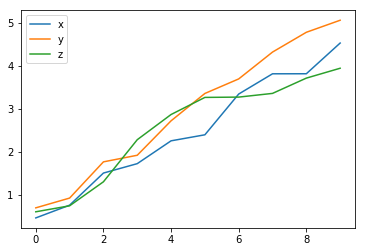

In [4]:
plot_time_series(arr)

x,y,zのデータを時間平均で引きたいとします。

In [5]:
# x,y,zの時間平均
arr.mean(axis=0)

array([2.46137664, 2.92372666, 2.53607118])

In [6]:
# 時間平均からの差
arr - arr.mean(axis=0)

array([[-1.99385054, -2.22250493, -1.92632916],
       [-1.69809656, -1.99557287, -1.78754056],
       [-0.95285298, -1.15520988, -1.23011131],
       [-0.73446751, -1.00196039, -0.25352882],
       [-0.20466906, -0.20289051,  0.33123514],
       [-0.06472181,  0.43222152,  0.72823605],
       [ 0.88104715,  0.76978561,  0.73538038],
       [ 1.35101524,  1.392636  ,  0.82131826],
       [ 1.35198525,  1.85206047,  1.17603512],
       [ 2.06461083,  2.13143499,  1.4053049 ]])

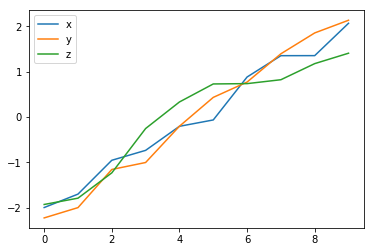

In [7]:
arr_meaned_time = arr - arr.mean(axis=0)
plot_time_series(arr_meaned_time)

次に、各時刻ごとに重心からの相対距離を求めてみます。

In [8]:
# 空間平均の時系列
arr.mean(axis=1)

array([0.59282995, 0.8133215 , 1.52766677, 1.97707258, 2.61495002,
       3.00563675, 3.43579587, 3.82871465, 4.10041844, 4.5075084 ])

これをこのまま引き算すると、shapeが合わないのでエラーが出てしまいます。  
形状を合わせるために、以下のような記法を使ってreshapeし、arrと演算できるようにします。  

In [9]:
arr.mean(axis=1)[:, np.newaxis]

array([[0.59282995],
       [0.8133215 ],
       [1.52766677],
       [1.97707258],
       [2.61495002],
       [3.00563675],
       [3.43579587],
       [3.82871465],
       [4.10041844],
       [4.5075084 ]])

In [10]:
# 重心からの相対距離
arr - arr.mean(axis=1)[:, np.newaxis]

array([[-0.12530384,  0.10839177,  0.01691207],
       [-0.05004141,  0.11483229, -0.06479088],
       [-0.0191431 ,  0.24085001, -0.22170691],
       [-0.25016345, -0.05530632,  0.30546977],
       [-0.35824244,  0.10588613,  0.25235631],
       [-0.60898191,  0.35031143,  0.25867048],
       [-0.09337208,  0.25771639, -0.16434431],
       [-0.01632277,  0.487648  , -0.47132522],
       [-0.28705655,  0.67536869, -0.38831214],
       [ 0.01847907,  0.54765325, -0.56613232]])

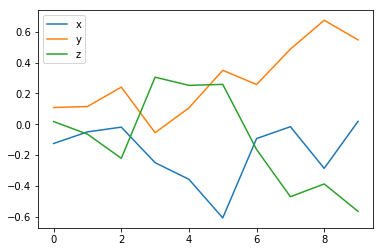

In [11]:
# 重心からの相対距離の時系列
arr_meaned_space = arr - arr.mean(axis=1)[:, np.newaxis]
plot_time_series(arr_meaned_space)

時系列のトレンドを引く場合も似たように書くことができます。